In [381]:
import numpy as np
from numpy import array
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import yfinance as yf

In [382]:
start_date = "1995-05-28"
end_date   = "2021-05-28"

gold_price = yf.download("GC=F",    start_date,end_date)
usd_price  = yf.download("DX-Y.NYB",start_date,end_date)
SnP_price  = yf.download("^GSPC",start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [383]:
# Reading Tab separated Value - https://www.longtermtrends.net/real-interest-rate/ 
File_Path = "d:\\NLP Course\\Stock Data\\US Interest rate data.csv"

df = pd.read_csv(File_Path, sep=',')

df.DateTime = pd.to_datetime(df.DateTime)

#US_Interest_Rate = df[df['DateTime'] > "05/24/2000 0:00"]

US_Interest_Rate = df[df['DateTime'] >= start_date]

#set index
US_Interest_Rate.index = pd.to_datetime(US_Interest_Rate.DateTime)

# Print first 5 data
US_Interest_Rate.head()

,DateTime,Nominal Interest Rate,Inflation Rate,Real Interest Rate
DateTime,,,,
1995-05-30,1995-05-30,5.83,NaN,2.643559
1995-05-31,1995-05-31,5.80,NaN,2.613559
1995-06-01,1995-06-01,5.68,3.040541,2.639459
1995-06-02,1995-06-02,5.51,NaN,2.469459
1995-06-05,1995-06-05,5.52,NaN,2.479459


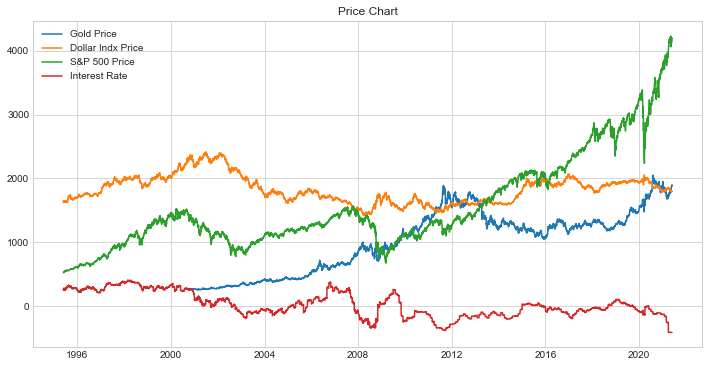

In [384]:
# Plot the price of the asset over time
plt.figure(figsize=(12,6))
plt.title('Price Chart')
plt.plot(gold_price['Adj Close'],label = 'Gold Price' )
plt.plot(usd_price['Adj Close']*20,label = 'Dollar Indx Price' )
plt.plot(SnP_price['Adj Close'],label = 'S&P 500 Price' )
plt.plot(US_Interest_Rate['Real Interest Rate'].dropna()*100,label = 'Interest Rate' )
plt.legend(loc='upper left')
plt.show()

In [385]:
#concateneate vertically axis = 1
df = pd.concat([gold_price['Adj Close'],SnP_price['Adj Close'],usd_price['Adj Close'],US_Interest_Rate['Real Interest Rate']],axis = 1)

df.head()

,Adj Close,Adj Close,Adj Close,Real Interest Rate
1995-05-29,NaN,NaN,81.099998,NaN
1995-05-30,NaN,523.580017,81.480003,2.643559
1995-05-31,NaN,533.400024,82.570000,2.613559
1995-06-01,NaN,533.489990,82.540001,2.639459
1995-06-02,NaN,532.510010,82.529999,2.469459


In [386]:
df = df.dropna()

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5131 entries, 2000-08-30 to 2021-05-27
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adj Close           5131 non-null   float64
 1   Adj Close           5131 non-null   float64
 2   Adj Close           5131 non-null   float64
 3   Real Interest Rate  5131 non-null   float64
dtypes: float64(4)
memory usage: 200.4 KB


In [388]:
df.columns = ['Gold Price','SnP_price','USD Index','Real Interest Rate']

In [389]:
df.tail()

,Gold Price,SnP_price,USD Index,Real Interest Rate
2021-05-21,1876.699951,4155.859863,90.019997,-4.119695
2021-05-24,1884.599976,4197.049805,89.830002,-4.119695
2021-05-25,1898.099976,4188.129883,89.639999,-4.119695
2021-05-26,1901.300049,4195.990234,90.040001,-4.119695
2021-05-27,1895.699951,4200.879883,89.970001,-4.119695


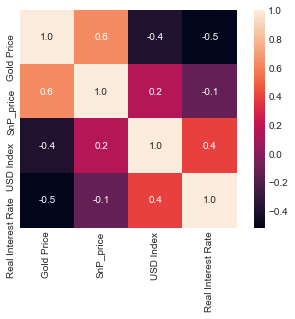

In [390]:
correlation = df.corr()
sns.heatmap(correlation,cbar = True,square = True, fmt = '0.1f',annot = True)

In [391]:
print(correlation['Gold Price'])

Gold Price            1.000000
SnP_price             0.635304
USD Index            -0.386959
Real Interest Rate   -0.516026
Name: Gold Price, dtype: float64


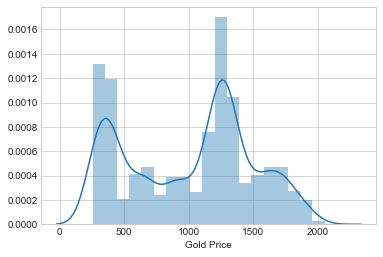

In [392]:
sns.distplot(df['Gold Price'])

In [393]:
X = df[['SnP_price','USD Index','Real Interest Rate']]
y = df['Gold Price']

In [394]:
X.shape, y.shape

((5131, 3), (5131,))

In [395]:
scaler = StandardScaler()
scaler.fit(X)
sacled_features = scaler.transform(X)

X_feat = pd.DataFrame(sacled_features)

X_feat.head()

,0,1,2
0,-0.271232,1.952668,2.279330
1,-0.251091,1.994024,2.258679
2,-0.246966,1.887937,2.201335
3,-0.265239,1.976943,2.201335
4,-0.285033,2.130680,2.208219


In [396]:
X_train,X_test,y_train,y_test = train_test_split(X_feat,y,test_size = 0.2, random_state=0)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((4104, 3), (1027, 3), (4104,), (1027,))

In [397]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test)

In [398]:
r2_error = r2_score(y_test,y_pred)
r2_error

0.9879698673271357

In [399]:
train_accuracy = regressor.score(X_train, y_train)*100
test_accuracy = regressor.score(X_test, y_test)*100

print("Training Accuracy = ", str(round(train_accuracy,1)) + '%')
print("Test Accuracy = ", str(round(test_accuracy,1)) + '%')

Training Accuracy =  99.8%
Test Accuracy =  98.8%


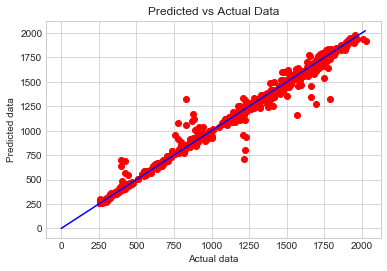

In [405]:
if max(y_test) >= max(y_pred):
       my_range = int(max(y_test))
else:
       my_range = int(max(y_pred))
    
plt.scatter(y_test, y_pred, color='red')
plt.plot(range(my_range), range(my_range), 'b')

# naming the x axis
plt.xlabel('Actual data')
# naming the y axis
plt.ylabel('Predicted data')
plt.title('Predicted vs Actual Data')

plt.show()